# Model and Evaluation

## Introduction
In the first part of the project, the complete dataset was imported from json files and then, relvant data for restaurants within Vancouver, British Columbia was extracted. In the second notebook, Data Cleaning, EDA and Features Engineering was performed for these restaurants using reviews and restaurants dataset.

In this notebook, we will use the final dataset generated at the end of notebook 2 and begin with the modelling process to predict whether a restaurant will remain open or closed in the future and what are the important features to predict it.

### Importing the Data Subset
After importing the `restaurants_final.csv` we will check the data to ensure that data is not corrupted.

**Importing**

The first step is to import all modules and libraries which will be used throughout this part. Afterwards, the dataframe will be imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix 
from sklearn.metrics import precision_score, recall_score, classification_report, roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# to display all columns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

Next, dataframe will be imported.

In [2]:
df = pd.read_csv(r'data\restaurants_final.csv')

We will look at the imported data next for any anomaly.

In [3]:
# view the data
df.head(3)

,latitude,longitude,stars,review_count,is_open,is_chain,RestaurantsPriceRange2,Num_of_attributes_shared,RestaurantsTakeOut_True,RestaurantsTakeOut_False,RestaurantsDelivery_True,RestaurantsDelivery_False,OutdoorSeating_True,OutdoorSeating_False,RestaurantsReservations_True,RestaurantsReservations_False,RestaurantsGoodForGroups_True,RestaurantsGoodForGroups_False,GoodForKids_True,GoodForKids_False,Japanese,Nightlife,Coffee & Tea,Bars,Sandwiches,Breakfast & Brunch,Cafes,Chinese,Sushi Bars,Canadian (New),Pizza,Fast Food,Burgers,Specialty Food,Seafood,Italian,Bakeries,Vietnamese,American (Traditional),American (New),Asian Fusion,Desserts,Vegetarian,Mediterranean,Indian,repeat_users,age,reviews_per_week,reactions_per_week,sentiment_score,review_length,user_stars,similar_restaurants_density,all_restaurants_density,relative_reviews_count,relative_reviews_per_week,relative_stars,relative_user_stars,relative_repeat_users,relative_price
0,49.251342,-123.101333,3.5,169,1,1,2,18,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,10.473973,0.327365,0.71272,0.718893,113.845714,4.0,4.0,177.0,0.851091,0.107363,-0.179047,0.237907,0.688899,0.415549
1,49.286360,-123.140261,4.5,31,0,0,2,13,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,1.583562,0.375433,1.17474,0.858216,133.129032,5.0,40.0,447.0,-0.382765,0.101881,1.534732,1.447258,-0.600865,0.356483
2,49.219532,-123.040893,1.0,9,1,0,1,12,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,6.345205,0.033050,0.07271,-0.466840,142.100000,1.0,2.0,10.0,-0.889747,-1.105672,-1.865010,-1.414214,-0.344124,-1.224745


In [4]:
# check the shape of data
df.shape

(4660, 60)

Number of rows and columns matches with the rows and columns of our final dataset in Notebook 2.

In [5]:
# check for any missing values
df.isna().sum()

latitude                          0
longitude                         0
stars                             0
review_count                      0
is_open                           0
is_chain                          0
RestaurantsPriceRange2            0
Num_of_attributes_shared          0
RestaurantsTakeOut_True           0
RestaurantsTakeOut_False          0
RestaurantsDelivery_True          0
RestaurantsDelivery_False         0
OutdoorSeating_True               0
OutdoorSeating_False              0
RestaurantsReservations_True      0
RestaurantsReservations_False     0
RestaurantsGoodForGroups_True     0
RestaurantsGoodForGroups_False    0
GoodForKids_True                  0
GoodForKids_False                 0
Japanese                          0
Nightlife                         0
Coffee & Tea                      0
Bars                              0
Sandwiches                        0
Breakfast & Brunch                0
Cafes                             0
Chinese                     

As there are no missing values in our data, we will start with building the models for the dataset.

### Modelling

As a first step towards modelling, data will be separated into predictors and target variable. In the dataset, target variable is 'is_open'.

In [6]:
# separate into predictors and target variable
X = df.drop(columns='is_open')
y = df['is_open']

We will now check the shape and view the data in both X and y.

In [7]:
# X shape and values
print(f'Shape of the X: {X.shape}')
X.head(2)

Shape of the X: (4660, 59)


,latitude,longitude,stars,review_count,is_chain,RestaurantsPriceRange2,Num_of_attributes_shared,RestaurantsTakeOut_True,RestaurantsTakeOut_False,RestaurantsDelivery_True,RestaurantsDelivery_False,OutdoorSeating_True,OutdoorSeating_False,RestaurantsReservations_True,RestaurantsReservations_False,RestaurantsGoodForGroups_True,RestaurantsGoodForGroups_False,GoodForKids_True,GoodForKids_False,Japanese,Nightlife,Coffee & Tea,Bars,Sandwiches,Breakfast & Brunch,Cafes,Chinese,Sushi Bars,Canadian (New),Pizza,Fast Food,Burgers,Specialty Food,Seafood,Italian,Bakeries,Vietnamese,American (Traditional),American (New),Asian Fusion,Desserts,Vegetarian,Mediterranean,Indian,repeat_users,age,reviews_per_week,reactions_per_week,sentiment_score,review_length,user_stars,similar_restaurants_density,all_restaurants_density,relative_reviews_count,relative_reviews_per_week,relative_stars,relative_user_stars,relative_repeat_users,relative_price
0,49.251342,-123.101333,3.5,169,1,2,18,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,10.473973,0.327365,0.71272,0.718893,113.845714,4.0,4.0,177.0,0.851091,0.107363,-0.179047,0.237907,0.688899,0.415549
1,49.286360,-123.140261,4.5,31,0,2,13,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,1.583562,0.375433,1.17474,0.858216,133.129032,5.0,40.0,447.0,-0.382765,0.101881,1.534732,1.447258,-0.600865,0.356483


In [8]:
# y shape and values
print(f'Shape of the y: {y.shape}')
y.head(2)

Shape of the y: (4660,)


0    1
1    0
Name: is_open, dtype: int64

There are 4,660 restaurants data (rows), 59 predictors and 1 target variable. Successively, the data will be split into train and test dataset and various models will be used to predict the target variable. Training and test sets are made to ensure that after training classification algorithm, it is able to generalize well to the new data.

In [9]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10, stratify=y)

# check the shape of train and test
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'X_test shape: {y_test.shape}')

X_train shape: (3262, 59)
y_train shape: (3262,)
X_test shape: (1398, 59)
X_test shape: (1398,)


On splitting the data, train dataset has 3,262 rows and test dataset has 1,398 rows. Next, different models will be used to predict the target variable. 

**1. Logistic Regression:**

For modelling, data should always be looked at to check whether scaling is required or not. 
As the target variable is a binary field, Logistic regression classifier is the most simple and effective algorithm that can be used to predict the target variable. 

In [10]:
# check the data
X.head(3)

,latitude,longitude,stars,review_count,is_chain,RestaurantsPriceRange2,Num_of_attributes_shared,RestaurantsTakeOut_True,RestaurantsTakeOut_False,RestaurantsDelivery_True,RestaurantsDelivery_False,OutdoorSeating_True,OutdoorSeating_False,RestaurantsReservations_True,RestaurantsReservations_False,RestaurantsGoodForGroups_True,RestaurantsGoodForGroups_False,GoodForKids_True,GoodForKids_False,Japanese,Nightlife,Coffee & Tea,Bars,Sandwiches,Breakfast & Brunch,Cafes,Chinese,Sushi Bars,Canadian (New),Pizza,Fast Food,Burgers,Specialty Food,Seafood,Italian,Bakeries,Vietnamese,American (Traditional),American (New),Asian Fusion,Desserts,Vegetarian,Mediterranean,Indian,repeat_users,age,reviews_per_week,reactions_per_week,sentiment_score,review_length,user_stars,similar_restaurants_density,all_restaurants_density,relative_reviews_count,relative_reviews_per_week,relative_stars,relative_user_stars,relative_repeat_users,relative_price
0,49.251342,-123.101333,3.5,169,1,2,18,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,10.473973,0.327365,0.71272,0.718893,113.845714,4.0,4.0,177.0,0.851091,0.107363,-0.179047,0.237907,0.688899,0.415549
1,49.286360,-123.140261,4.5,31,0,2,13,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,1.583562,0.375433,1.17474,0.858216,133.129032,5.0,40.0,447.0,-0.382765,0.101881,1.534732,1.447258,-0.600865,0.356483
2,49.219532,-123.040893,1.0,9,0,1,12,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,6.345205,0.033050,0.07271,-0.466840,142.100000,1.0,2.0,10.0,-0.889747,-1.105672,-1.865010,-1.414214,-0.344124,-1.224745


As can be seen from the table above, the range for the data fields are on different scales and scaling is required to prevent one feature to dominate over the other features. In this dataset, there are many binary columns, therefore, we will use MinMaxScaler for the first version and later, select the best model by using Gridsearch.

In [11]:
# instantiate the scaler
mm = MinMaxScaler()

# fit and transform train data
X_train_scaled = mm.fit_transform(X_train)

# transform test data
X_test_scaled = mm.transform(X_test)

Next, we will train Logistic regression model and check the accuracy of the model.

In [12]:
# instantiate the model
logreg = LogisticRegression()

# train the model
logreg.fit(X_train_scaled, y_train)

# check the accuracy
print(f'Train Score: {logreg.score(X_train_scaled, y_train)}')
print(f'Test Score: {logreg.score(X_test_scaled, y_test)}')

Train Score: 0.8332311465358676
Test Score: 0.8261802575107297


The first model has accuracy of 83.3% on train data and 82.6% on test data. Next, we will evaluate this model using confusion matrix, classification scores and ROC curve.

In [13]:
# Get class predictions
y_pred = logreg.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Closed", "Predicted Open"],
    index=["True Closed", "True Open"]
)

display(cf_df)

,Predicted Closed,Predicted Open
True Closed,441,138
True Open,105,714


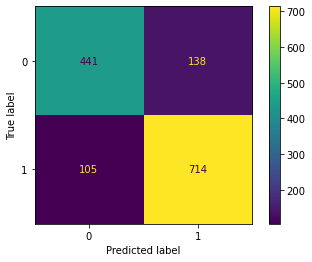

In [14]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(logreg, X_test_scaled, y_test)

Our model predicted the following:
- **True Negative:** 441, this represents the number of restaurants predicted by the model to be closed, which were actually closed and hence, satisfactory.
- **True Positive:** 714, this number is the number of restaurants predicted as open and are actually open.
- **False Negative:** 105, this gives the number of restaurants that were predicted to be closed but were actually open giving  a false closed.
- **False Positive:** 138, these are the number of restaurants predicted as open but were actually closed giving  a false open.

Comparatively, there is a higher number of False Positives in our data which wrongly classifies closed restaurant as open.

Next, we will take a look at precision and recall score where:

Precision measures what proportion of a model assigned to positive/negative class are actually members of the positive/negative class:

$$Precision = \frac{TP}{TP+FP}$$

On the other hand, recall score measures the proportion of the positive class the model correctly identified out of the total actual positives:

$$Recall = \frac{TP}{TP+FN}$$

In [15]:
# check precision and recall score for the model
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       579
           1       0.84      0.87      0.85       819

    accuracy                           0.83      1398
   macro avg       0.82      0.82      0.82      1398
weighted avg       0.83      0.83      0.83      1398



The above model gives a precision score of 81% for closed class and 84% for open class of restaurants. Recall score is 76% for closed restaurants and 87% for open restauarants. With a high precision, model identifies points belonging to a class correctly. With a high recall score, model is not missing significant class members. This model has a low recall for closed class. 

Next, we will plot the Receiver Operating Characteristic, or ROC curve which compares the true positive and false positive rates of a binary model.

A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR).

- the true positive rate is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN)).

- the false positive rate is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)).

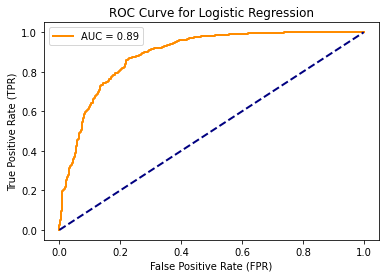

Area under curve (AUC) test data:0.8875076180775663


In [16]:
# Make probabilistic predictions (scores)
y_proba_test = logreg.predict_proba(X_test_scaled)[:,1]

# getting false positive rate and true positive rate
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)

# area under curve score
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_test, tprs_test, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC) test data:{roc_auc_test}')

Each point on the curve represents a tradeoff between true and false positive rates. For example, if false positive rate of  0.4 is considered, then a true positive rate of ~ 0.89 can be achieved. If true positive rate has to be increased more than this, then false positive rate will also be high and model will wrongly identify closed restaurants as open restaurants. However, this is not the best approach as predicting everything positive will increase the true positive rate, but  consequently, this will also misclassify several closed restaurants as open. The diagonal line represents a random guess. It serves as a baseline to compare the curve against. When the curve is above it, it represents that the model is performing better than random choice which is 50% probability. Below this line, model is performing worse than random choice.

Next, feature importance will be analyzed:

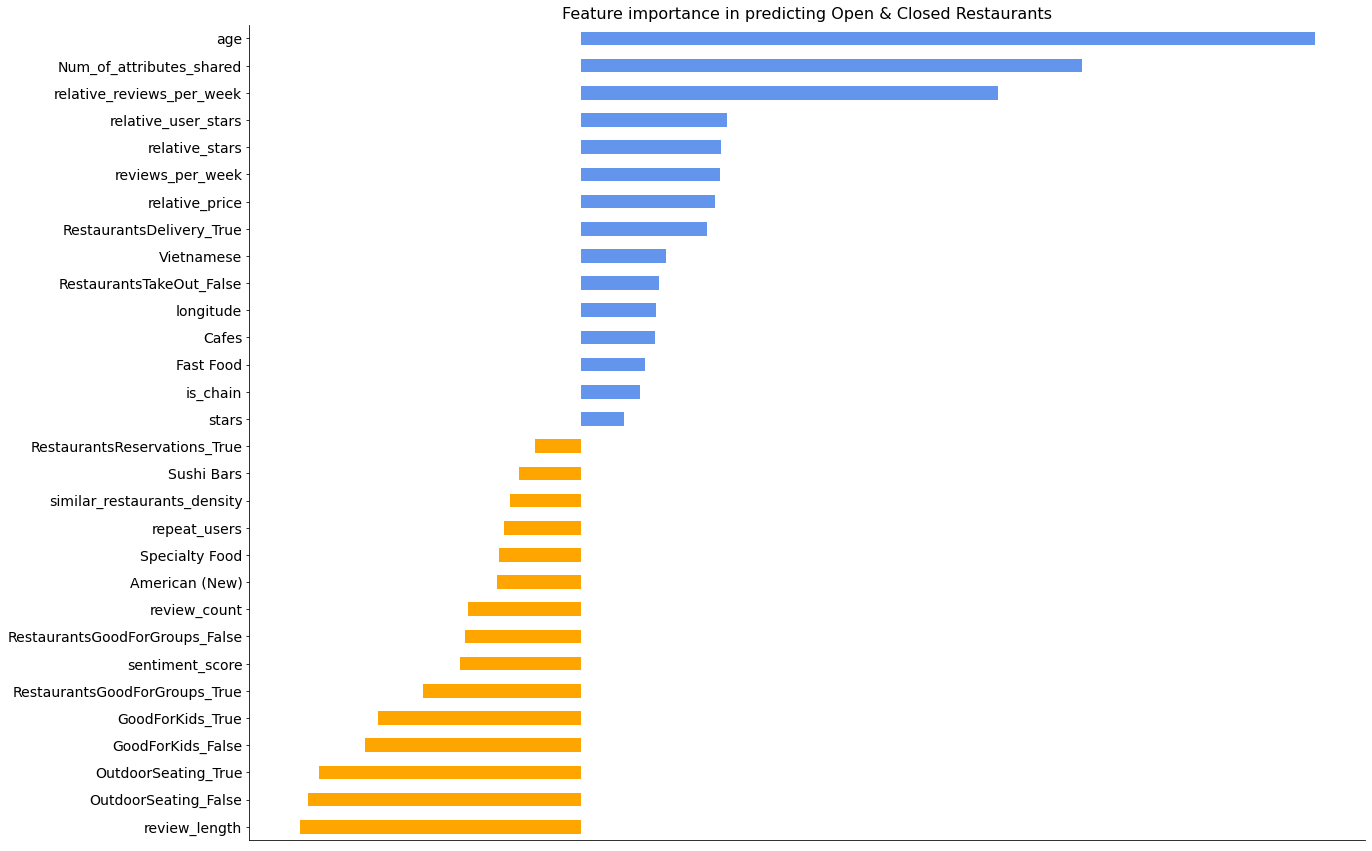

In [17]:
# Getting the regression coefficients
coef = logreg.coef_[0]

# put coefficient in a dataframe
coef_df = pd.DataFrame(coef, X_train.columns, columns=['Coefficient'])

# add odds_ratio for better interpretation of coefficients
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])

# add top 10 features in df for open and closed category
df_open = coef_df.sort_values(by='Coefficient', ascending=False).head(15)
df_close = coef_df.sort_values(by='Coefficient', ascending=True).head(15)


coef_imp = pd.concat([df_open, df_close], axis=0)

clrs = ['cornflowerblue' if (x > 0) else 'orange' for x in coef_imp['Coefficient'].sort_values()]

plt.figure(figsize=(20,15))
coef_imp['Coefficient'].sort_values().plot(kind='barh', color=clrs)
plt.title('Feature importance in predicting Open & Closed Restaurants', size=16)
plt.yticks(size=14)
plt.xticks([])
sns.despine()
plt.show()

Primary features in predicting if a restaurant will remain open in the future are: 
1. Age: It provides information about how old is the restaurant
2. Number of attributes shared: There are a total of 35 attributes that are listed on yelp for restaurants. The most successful restaurants share majorly all of attributes, which correspond to the services available at that restaurant.
3. Relative Reviews per week: This field provides information about how many reviews are received by a restaurant as compared to it's neighbors within 1 km radius.

Expectedly, chain restaurants, cafes, Vietnamese and fast food category are more likely to remain open.

Vital features in predicting if a restaurant will be closed are:
1. Review length: Longer the review length, which is usually the case with bad reviews, the higher the chances for the restaurant running out of business in the future.
2. Sentiment score: Sentiment behind the user reviews also impact the sustainability of the restaurant.
3. Review_Count: This field provides the count of reviews written for that particular restaurant.

For features such as Outdoor seating, RestaurantsGoodForGroups and GoodForKids features, it seems that these do not directly correlate to a restaurant's future as irrespective of true value or a false value, the restaurant was closed.

We also see some categories such as American (New), Sushi Bars and Specialty Food are more likely to close.

**2. Decision Tree:** We will see if we can get better results by using Decision tree algorithm. For modelling with Decision Tree, scaling is not required and we will use X_train and X_test data instead of scaled data.

In [18]:
# intantiate the model
dt = DecisionTreeClassifier(max_depth=5)

# train the model
dt.fit(X_train, y_train)

# check the score
print(f'Decision Tree Train Score: {dt.score(X_train, y_train)}')
print(f'Decision Tree Test Score: {dt.score(X_test, y_test)}')

Decision Tree Train Score: 0.8047210300429185
Decision Tree Test Score: 0.7646638054363376


Accuracy score has decreased for decision tree as compared to Logistic Regression. To evaluate the decision tree model, we will use same metrics classification report and ROC curve.

In [19]:
# Get class predictions
y_pred = dt.predict(X_test)

# check precision and recall score for the model
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       579
           1       0.79      0.81      0.80       819

    accuracy                           0.76      1398
   macro avg       0.76      0.76      0.76      1398
weighted avg       0.76      0.76      0.76      1398



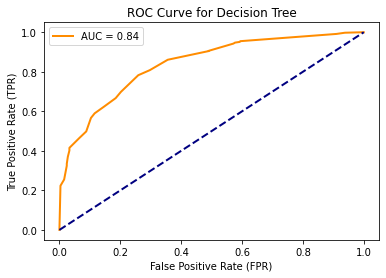

Area under curve (AUC) test data:0.838546312639577


In [20]:
# Make probabilistic predictions (scores)
y_proba_test = dt.predict_proba(X_test)[:,1]

# getting false positive rate and true positive rate
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)

# area under curve score
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_test, tprs_test, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC) test data:{roc_auc_test}')

Using decision tree, accuracy of test set has decreased to 76.4% as compared to 82.6% under Logistic Regression. AUC, precision and recall score have reduced as well.

|      Model          |    Test Score   |    AUC    |     Class    |    Precision Score      |     Recall Score      |
|---------------------|-----------------|-----------|--------------|-------------------------|-----------------------|
| Logistic Regression |      0.826      |   0.887   |       0      |         0.81            |         0.76          |
|                     |                 |           |       1      |         0.84            |         0.87          |
| Decision Tree       |      0.765      |   0.838   |       0      |         0.72            |         0.70          |
|                     |                 |           |       1      |         0.79            |         0.81          |

**3. Random Forest:** Next classifier to train our data is Random Forest which works on Bagging concept. It avoids overfitting problem and gives better results as compared to decision tree.

In [21]:
# intantiate the model
rf = RandomForestClassifier(max_depth=5)

# train the model
rf.fit(X_train, y_train)

# check the score
print(f'Random Forest Train Score: {rf.score(X_train, y_train)}')
print(f'Random Forest Test Score: {rf.score(X_test, y_test)}')

Random Forest Train Score: 0.8274064990803188
Random Forest Test Score: 0.8133047210300429


We see better accuracy as compared to decision tree. Next, we will look how well it performs on precision and recall score.

In [22]:
# Get class predictions
y_pred = rf.predict(X_test)

# check precision and recall score for the model
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.85      0.67      0.75       579
           1       0.80      0.91      0.85       819

    accuracy                           0.81      1398
   macro avg       0.82      0.79      0.80      1398
weighted avg       0.82      0.81      0.81      1398



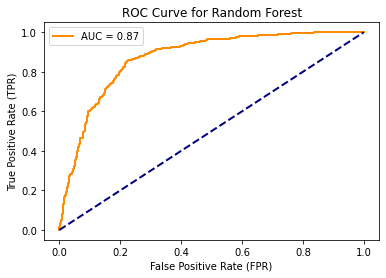

Area under curve (AUC) test data:0.8709218242896998


In [23]:
# Make probabilistic predictions (scores)
y_proba_test = rf.predict_proba(X_test)[:,1]

# getting false positive rate and true positive rate
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)

# area under curve score
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_test, tprs_test, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC) test data:{roc_auc_test}')

Random forest gives better performance than decision tree and gives high precision score of 86% for closed class and high recall of 92% for open class but recall for closed class has gone down to 66%. Area under curve is comparable to Logistic Regression.


|      Model          |    Test Score   |    AUC    |     Class    |    Precision Score      |     Recall Score      |
|---------------------|-----------------|-----------|--------------|-------------------------|-----------------------|
| Logistic Regression |      0.826      |   0.887   |       0      |         0.81            |         0.76          |
|                     |                 |           |       1      |         0.84            |         0.87          |
| Decision Tree       |      0.765      |   0.838   |       0      |         0.72            |         0.70          |
|                     |                 |           |       1      |         0.79            |         0.81          |
| Random Forest       |      0.813      |   0.871   |       0      |         0.85            |         0.67          |
|                     |                 |           |       1      |         0.80            |         0.91          |

**4. Gradient Boosting:** We will now look at Gradient Boosting Model, the last one, for our data.

In [24]:
# intantiate the model
gb = GradientBoostingClassifier()

# train the model
gb.fit(X_train, y_train)

# check the score
print(f'Gradient Boosting Train Score: {gb.score(X_train, y_train)}')
print(f'Gradient Boosting Test Score: {gb.score(X_test, y_test)}')

Gradient Boosting Train Score: 0.8902513795217658
Gradient Boosting Test Score: 0.8397711015736766


There is improved accuracy of 89% on train data and ~84% on test data which is the best score so far. We will measure it's performance using same metrics as before, precision score, recall score and ROC curve.

In [25]:
# Get class predictions
y_pred = gb.predict(X_test)

# check precision and recall score for the model
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       579
           1       0.84      0.90      0.87       819

    accuracy                           0.84      1398
   macro avg       0.84      0.83      0.83      1398
weighted avg       0.84      0.84      0.84      1398



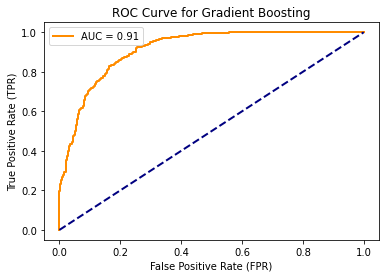

Area under curve (AUC) test data:0.9134544212264419


In [26]:
# Make probabilistic predictions (scores)
y_proba_test = gb.predict_proba(X_test)[:,1]

# getting false positive rate and true positive rate
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)

# area under curve score
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_test, tprs_test, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC) test data:{roc_auc_test}')

Gradient Boosting has increased the performance on all parameters. It has higher Area under the curve as compared to other 3 models, higher precision and recall score.

|      Model          |    Test Score   |    AUC    |     Class    |    Precision Score      |     Recall Score      |
|---------------------|-----------------|-----------|--------------|-------------------------|-----------------------|
| Logistic Regression |      0.826      |   0.887   |       0      |         0.81            |         0.76          |
|                     |                 |           |       1      |         0.84            |         0.87          |
| Decision Tree       |      0.765      |   0.838   |       0      |         0.72            |         0.70          |
|                     |                 |           |       1      |         0.79            |         0.81          |
| Random Forest       |      0.813      |   0.871   |       0      |         0.85            |         0.67          |
|                     |                 |           |       1      |         0.80            |         0.91          |
| Gradient Boosting   |      0.839      |   0.913   |       0      |         0.84            |         0.76          |
|                     |                 |           |       1      |         0.84            |         0.90          |

Since gradient boosting model provides the best results, we will use this model to find the most important features based on the following:

In [27]:
# extract feature importances from the fitted gradient boosting model
importances = gb.feature_importances_

# get the indices of the largest to smallest feature importances
indices = np.argsort(importances)[::-1]

for i in range(X_test.shape[1]):
    print("%d. feature: %s (%f)" % (i + 1, X_train.iloc[:,indices[i]].name, importances[indices[i]]))

1. feature: age (0.423431)
2. feature: Num_of_attributes_shared (0.080695)
3. feature: RestaurantsDelivery_True (0.062599)
4. feature: review_length (0.053658)
5. feature: relative_reviews_per_week (0.045367)
6. feature: RestaurantsGoodForGroups_True (0.044120)
7. feature: GoodForKids_True (0.038215)
8. feature: relative_user_stars (0.035427)
9. feature: GoodForKids_False (0.028044)
10. feature: OutdoorSeating_False (0.023292)
11. feature: relative_reviews_count (0.020230)
12. feature: reactions_per_week (0.018536)
13. feature: RestaurantsDelivery_False (0.016471)
14. feature: RestaurantsGoodForGroups_False (0.016440)
15. feature: relative_price (0.015458)
16. feature: reviews_per_week (0.009297)
17. feature: longitude (0.008065)
18. feature: all_restaurants_density (0.007471)
19. feature: is_chain (0.006358)
20. feature: OutdoorSeating_True (0.006226)
21. feature: relative_stars (0.005327)
22. feature: relative_repeat_users (0.003889)
23. feature: sentiment_score (0.003600)
24. featur

Looking at the features data, we can see the last 10 features are restaurant categories which are the least important features in predicting the class of our target variable. Salient features are the age, number of attributes shared, Restaurants Delivery service, review_length, other services available at the restaurant, location and whether restaurant is part of a chain.

Based on the different scores, Gradient Boosting and Logistic Regression gave the best performance. So, we will use GridSearch to determine best model using hyperparameter optimization and then build the model with best estimators and evaluate the model for it's performance.

In [31]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)


estimators = [
    ('normalise', StandardScaler()),
    ('model', GradientBoostingClassifier())
]

pipe = Pipeline(estimators)

param_grid = [
            {
                'model': [LogisticRegression()], 
                'normalise': [StandardScaler(), MinMaxScaler(), None],
                'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                'model__solver': ['lbfgs', 'liblinear']
            }, 
            {
                'model': [GradientBoostingClassifier()],
                'normalise': [None], 
                'model__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                'model__max_depth': [3, 5, 7, 9, 12],
                'model__n_estimators': [100, 200, 300, 400, 500, 600],
                'model__max_features': ['sqrt', 'log2']
            }
] 

grid = GridSearchCV(pipe, param_grid, cv=5, verbose=2) 

fittedgrid = grid.fit(X_train, y_train)

Fitting 5 folds for each of 414 candidates, totalling 2070 fits
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=MinMaxScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.0001, model__solver=lbfgs, normalise=M

Next, we will look into the best estimators that we received through GridSearch using best_estimator_ method or best_params_ method.

In [32]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', None),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.15, max_depth=5,
                                            max_features='sqrt',
                                            n_estimators=400))])

In [33]:
# best parameters
fittedgrid.best_params_

{'model': GradientBoostingClassifier(learning_rate=0.15, max_depth=5, max_features='sqrt',
                            n_estimators=400),
 'model__learning_rate': 0.15,
 'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__n_estimators': 400,
 'normalise': None}

Next, the model will be trained based on these parameters.

In [34]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# intantiate the model with best estimators
gb = GradientBoostingClassifier(learning_rate=0.15, max_depth=5,max_features='sqrt',n_estimators=400)

# train the model
gb.fit(X_train, y_train)

# check the score
print(f'Gradient Boosting Train Score: {gb.score(X_train, y_train)}')
print(f'Gradient Boosting Test Score: {gb.score(X_test, y_test)}')

Gradient Boosting Train Score: 1.0
Gradient Boosting Test Score: 0.8526466380543634


A test score of 85.3% has been received which is ~1.3% higher than the result received before optimizing the hyperparameters. We also see, train score of 100% which shows overfitting of the train data. We will look into precision and recall score to see if there is any improvement in our recall score mainly for Closed class.

In [35]:
# Get class predictions
y_pred = gb.predict(X_test)

# check precision and recall score for the model
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       581
           1       0.86      0.89      0.88       817

    accuracy                           0.85      1398
   macro avg       0.85      0.84      0.85      1398
weighted avg       0.85      0.85      0.85      1398



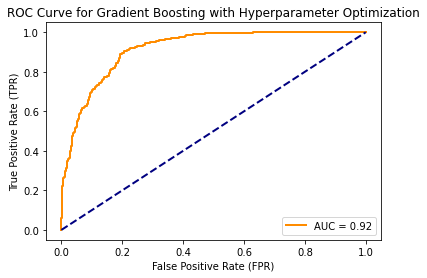

Area under curve (AUC) test data:0.9154456609441788


In [36]:
# Make probabilistic predictions (scores)
y_proba_test = gb.predict_proba(X_test)[:,1]

# getting false positive rate and true positive rate
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)

# area under curve score
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_test, tprs_test, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Gradient Boosting with Hyperparameter Optimization')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC) test data:{roc_auc_test}')

There is major improvement in the recall score for closed class which improved from 76% to 79%. Area under curve also improved from 91.33% to 91.54%. We can look at the final model comparisons below:

|      Model          |    Test Score   |    AUC    |     Class    |    Precision Score      |     Recall Score      |
|---------------------|-----------------|-----------|--------------|-------------------------|-----------------------|
| Logistic Regression |      0.826      |   0.887   |       0      |         0.81            |         0.76          |
|                     |                 |           |       1      |         0.84            |         0.87          |
| Decision Tree       |      0.765      |   0.838   |       0      |         0.72            |         0.70          |
|                     |                 |           |       1      |         0.79            |         0.81          |
| Random Forest       |      0.813      |   0.871   |       0      |         0.85            |         0.67          |
|                     |                 |           |       1      |         0.80            |         0.91          |
| Gradient Boosting   |      0.839      |   0.913   |       0      |         0.84            |         0.76          |
|                     |                 |           |       1      |         0.84            |         0.90          |
| GB - Hyperparameter Optimization|0.853|   0.915   |       0      |         0.84            |         0.79          |
|                     |                 |           |       1      |         0.86            |         0.89          |

We will now look into the essential features for predicting a restaurant's sustainability:

In [37]:
# extract feature importances from the fitted gradient boosting model
importances = gb.feature_importances_
features_df = pd.DataFrame(columns=['feature', 'importance'])
i = 0
for col in X_train.columns:
    features_df.loc[i, 'feature'] = col
    features_df.loc[i, 'importance'] = importances[i]
    i += 1

features_df = features_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

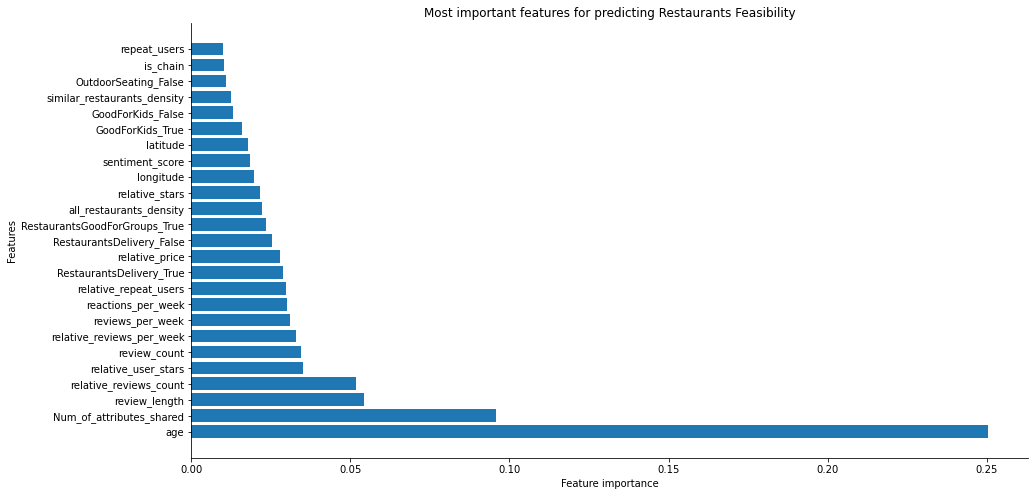

In [38]:
# check most important features  
plt.figure(figsize=(15,8))
plt.barh(features_df['feature'].head(25), features_df['importance'].head(25))
plt.title('Most important features for predicting Restaurants Feasibility')
plt.xlabel('Feature importance')
plt.ylabel('Features')
sns.despine()
plt.show()

**Conclusion:**
Based on our analysis of the given dataset, key features for predicting a restaurant's feasibility are:
1. **Age:** As expected, age of a restaurant plays a major role in predicting a restaurant's life. Probability of a restaurant getting closed is low if it's been in business a long period of time as compared to new restaurants who are yet to establish their name and place in the market. The older the restaurant, the larger it's customer base would be. More customers in turn generate larger revenues for the business and help the business live longer. 
2. **Number of Attributes Shared:** Most successful restaurants share information about their business' attributes which help customers in making informed decision about whether to visit that outlet or not based on what they are looking for. Uninformed customer is more likely to get disappointed later if the customer does not get any particular service/feature they were looking. For example, if a restaurant has specifically provided information about lack of parking facilities at the area, it will significantly help the customer to be prepared for it and use alternate way of transportation or park their vehicle somewhere else.
3. **Review Count:** Number of reviews received convey the popularity of a restaurant and helps in it's success in the digital world where new customers always check the reviews before visiting a new place. If a place is highly positively reviewed, a new customer is more likely to visit that restaurant. 
4. **Review Length:** Number of words used in the reviews can help predicting the restaurant's feasibility as a customer may write about their exceptional experience or dissatisfaction in a well-written, strongly worded review. Emotions, positive or negative, are generally explained with reasons and hence, this could strongly help in predicting the life/performance of a restaurant.
5. **Restaurant Delivery:** Whether a restaurant is providing delivery services or not is essential in today's times. Not everyone is able to dine-in during the weekdays. With the ongoing pandemic, people generally prefer to place an order for home delivery to avoid contact with other people. This also helps reduce the wait and travel time for them. Hence, this attribute is extremely important in predicting a restaurant's life. 
6. **Reviews per week:** This feature provides insight about how a restaurant is performing in terms of weekly footfall and weekly reviews written by it's customers. 
7. **Relative Reviews Count:** Review count is directly proportional to the footfall. This field provides information about how a restaurant is performing as compared to the mean value for restaurants in it's vicinity.
8. **Reactions per week:** Reactions are votes received on reviews in terms of how other users found the review, useful, funny or cool. The more the reactions, larger gets the expected footfall.   
9. **Relative Price:** Price range of a restaurant as compared to it's neighboring restaurants can considerably impact the business. If the prices are set higher than the neighboring competing restaurants, it can have a negative impact on it's business given the fact that similar quality and taste are offered by it's competitors. Visa versa, in case a restaurant chooses to set a sizably lower price to entice customers, it may be perceived as offering a lower quality and may not work for them. Hence, a deeper analysis into the right price range may be required by the businesses for sustenance.  
10. **Restaurant Density:** Number of restaurants within it's vicinity can help in predicting a restaurant's success. As the number of restaurants increase, the customer base gets divided leading to a tight race for survival.
11. **Relative User Stars:** Stars received by a restaurant relative to places in it's neighborhood is a strong metric. When in the area, a person definitely looks atit's stars rating while deciding on a place to eat. Restaurants with higher ratings are generally preferred and this field can immensely help in measuring a restaurant's performance.